In [1]:
from transformers.utils import *
from transformers.components import *
from datetime import datetime, timedelta
import yfinance as yf
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from time import time as t
import numpy as np

from data_handlers import *

device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(device)

cuda:0


[*********************100%***********************]  96 of 96 completed

ERROR 
1 Failed download:
ERROR ['DOF.OL']: Exception('DOF.OL: No data found, symbol may be delisted')



Tickers:  ['2020.OL', 'ABG.OL', 'ABL.OL', 'ADE.OL', 'AFG.OL', 'AGLX.OL', 'AIRX.OL', 'AKAST.OL', 'AKER.OL', 'AKBM.OL', 'AKRBP.OL', 'ACC.OL', 'AKH.OL', 'AKSO.OL', 'AKVA.OL', 'AMSC.OL', 'ARCH.OL', 'AZT.OL', 'AFK.OL', 'ARR.OL', 'ASTK.OL', 'ASA.OL', 'AURG.OL', 'AUTO.OL', 'AGAS.OL', 'ACR.OL', 'BAKKA.OL', 'BELCO.OL', 'BGBIO.OL', 'BEWI.OL', 'BIEN.OL', 'BNOR.OL', 'BONHR.OL', 'BOR.OL', 'BRG.OL', 'BOUV.OL', 'BWE.OL', 'BWLPG.OL', 'BWO.OL', 'BMA.OL', 'CADLR.OL', 'CARA.OL', 'CRNA.OL', 'CLOUD.OL', 'CONTX.OL', 'CRAYN.OL', 'DNB.OL', 'DNO.OL', 'DOF.OL', 'EWIND.OL', 'EIOF.OL', 'EMGS.OL', 'ELK.OL', 'ELABS.OL', 'ELMRA.OL', 'ELO.OL', 'ENDUR.OL', 'ENSU.OL', 'ENTRA.OL', 'EQNR.OL', 'EQVA.OL', 'EPR.OL', 'FLNG.OL', 'FRO.OL', 'FROY.OL', 'GIG.OL', 'RISH.OL', 'GENT.OL', 'GJF.OL', 'GOGL.OL', 'GOD.OL', 'GCC.OL', 'GSF.OL', 'GYL.OL', 'HAFNI.OL', 'HAVI.OL', 'HEX.OL', 'HPUR.OL', 'HBC.OL', 'HYPRO.OL', 'HAUTO.OL', 'HSPG.OL', 'IDEX.OL', 'IOX.OL', 'ITERA.OL', 'JIN.OL', 'JAREN.OL', 'KAHOT.OL', 'KID.OL', 'KIT.OL', 'KCC.OL', '

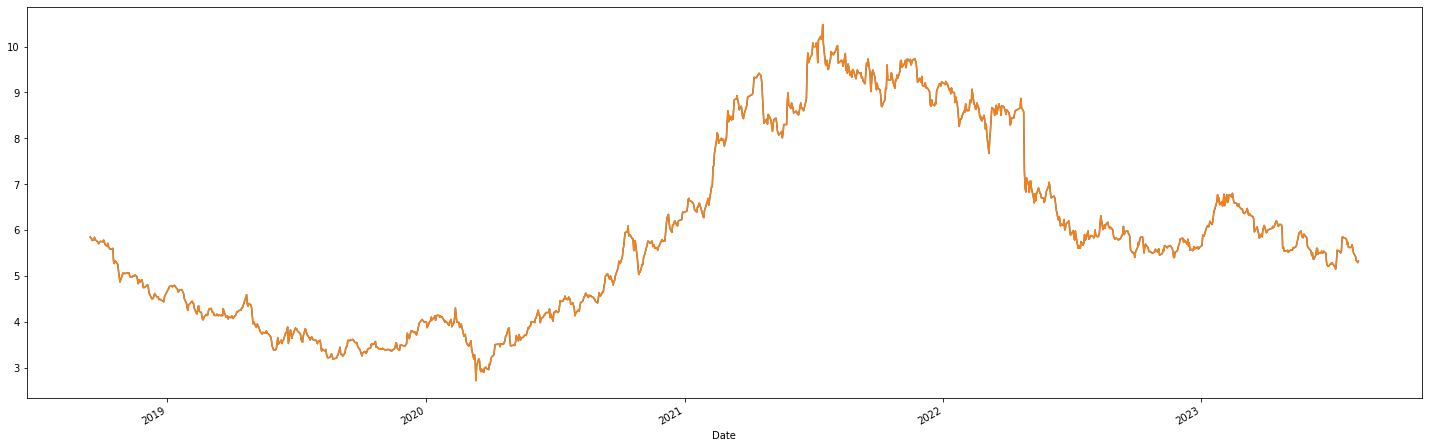

In [2]:
# Ticker symbols from OSLO BØRS
ticker_list = ['2020.OL', 'ABG.OL', 'ABL.OL', 'ADE.OL', 'AFG.OL', 'AGLX.OL', 
               'AIRX.OL', 'AKAST.OL', 'AKER.OL', 'AKBM.OL', 'AKRBP.OL', 'ACC.OL', 
               'AKH.OL', 'AKSO.OL', 'AKVA.OL', 'AMSC.OL', 'ARCH.OL', 'AZT.OL', 
               'AFK.OL', 'ARR.OL', 'ASTK.OL', 'ASA.OL', 'AURG.OL', 'AUTO.OL', 
               'AGAS.OL', 'ACR.OL', 'BAKKA.OL', 'BELCO.OL', 'BGBIO.OL', 'BEWI.OL', 
               'BIEN.OL', 'BNOR.OL', 'BONHR.OL', 'BOR.OL', 'BRG.OL', 'BOUV.OL', 
               'BWE.OL', 'BWLPG.OL', 'BWO.OL', 'BMA.OL', 'CADLR.OL', 'CARA.OL', 
               'CRNA.OL', 'CLOUD.OL', 'CONTX.OL', 'CRAYN.OL', 'DNB.OL', 'DNO.OL', 
               'DOF.OL', 'EWIND.OL', 'EIOF.OL', 'EMGS.OL', 'ELK.OL', 'ELABS.OL', 
               'ELMRA.OL', 'ELO.OL', 'ENDUR.OL', 'ENSU.OL', 'ENTRA.OL', 'EQNR.OL', 
               'EQVA.OL', 'EPR.OL', 'FLNG.OL', 'FRO.OL', 'FROY.OL', 'GIG.OL', 
               'RISH.OL', 'GENT.OL', 'GJF.OL', 'GOGL.OL', 'GOD.OL', 'GCC.OL', 
               'GSF.OL', 'GYL.OL', 'HAFNI.OL', 'HAVI.OL', 'HEX.OL', 'HPUR.OL', 
               'HBC.OL', 'HYPRO.OL', 'HAUTO.OL', 'HSPG.OL', 'IDEX.OL', 'IOX.OL', 
               'ITERA.OL', 'JIN.OL', 'JAREN.OL', 'KAHOT.OL', 'KID.OL', 'KIT.OL', 
               'KCC.OL', 'KMCP.OL', 'KOMPL.OL', 'KOA.OL', 'KOG.OL', 'LSG.OL'
               ]

# Get today's date
end = datetime.today().strftime('%Y-%m-%d')

# Calculate the start date (5 years ago from today)
start = (datetime.today() - timedelta(days=5*365)).strftime('%Y-%m-%d')

# Get the date ca 8 months ago from today
validation_start = (datetime.today() - timedelta(days=1*30)).strftime('%Y-%m-%d')


results = fetch_data(ticker_list, start, end, validation_start)
results = [result for result in results if result is not None] # Remove any None results (i.e., failed downloads)

# Split results into separate lists
tickers, training_data_list, validation_data_list = results

print('Tickers: ', tickers)
print('Training data: ', training_data_list['ABG.OL'].columns)

training_data_list['ABG.OL']['Close'].plot(figsize = (25, 8))
training_data_list['ABG.OL']['5-day Moving Average'].plot()
plt.show()


In [3]:
train_dataset = TransformerLMDataset(training_data_list, ticker_list, device = device)
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)

validation_dataset = TransformerLMDataset(validation_data_list, ticker_list, device = device)
validation_loader = DataLoader(validation_dataset, batch_size=512, shuffle=True)

c:\Users\sigro\Documents\Projects\stock_trader\data_handlers.py:62: RuntimeWarning: divide by zero encountered in true_divide
  data /= data[0]
c:\Users\sigro\Documents\Projects\stock_trader\data_handlers.py:62: RuntimeWarning: invalid value encountered in true_divide
  data /= data[0]


In [4]:
src_vocab_size = 6
tgt_vocab_size = 1
d_model = 6
num_heads = 6
num_layers = 4
d_ff = 512
max_seq_length = 8
dropout = 0.0

transformer = Transformer(src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout, device).to(device)

criterion = nn.L1Loss()
optimizer = optim.Adam(transformer.parameters(), lr=0.001, betas=(0.9, 0.98), eps=1e-9, weight_decay=0)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.8)

transformer.train()
start = t()
epochs = 80
for epoch in range(epochs):
    l = 0
    for inputs, targets in train_loader:

        optimizer.zero_grad()
        output = transformer(inputs, torch.zeros_like(targets))

        loss = criterion(output, targets)
        loss.backward()
        optimizer.step()
        l += loss.item()


    scheduler.step()
    '''if epoch % 1 == 0:
        transformer.eval()
        with torch.no_grad():
            v_l = []
            for i, o in validation_loader:
                v_l += trading_earnings(transformer(i, torch.zeros_like(o)), o)
            v_l = np.array(v_l)*100 # to get pct

            v_t = []
            for i, o in train_loader:
                v_t += trading_earnings(transformer(i, torch.zeros_like(o)), o)
            v_t = np.array(v_t)*100 # to get as pct

            print(f"Epoch {epoch+1}/{epochs}:\n"
                    f"  - Train Loss: {l:.4f}\n"
                    f"  - Train Earnings (over {len(v_t)} trades): \n"
                    f"     * Mean: {mean_confidence_interval(v_t)[0]:.4f}%\n"
                    f"     * 95%-CI: [{mean_confidence_interval(v_t)[1]:.4f}, {mean_confidence_interval(v_t)[2]:.4f}]\n"
                    f"  - Val Earnings (over {len(v_l)} trades):\n"
                    f"     * Mean: {mean_confidence_interval(v_l)[0]:.4f}%\n"
                    f"     * 95%-CI: [{mean_confidence_interval(v_l)[1]:.4f}, {mean_confidence_interval(v_l)[2]:.4f}]\n"
                    f"  - Time Elapsed: {t() - start:.2f} seconds\n")
            #print(f"Epoch {epoch+1} -- Train Loss: {l} | Train Earnings: {mean_confidence_interval(v_t)} over {len(v_t)} | Val Earnings: {mean_confidence_interval(v_l)} over {len(v_l)} | Time: {t() - start}")
        start = t()
        transformer.train()'''
    
torch.save(transformer.state_dict(), 'model.pt')

In [ ]:
transformer.eval()
with torch.no_grad():
    start = t()
    v_l = []
    for i, o in validation_loader:

        for j in range(10):
            print('Input: ', i[j][-1]) # Sample j, last time step
            print('Prediction: ', transformer(i, torch.zeros_like(o)*(0))[j])
            print('Label: ', o[j][-1])
            print('\n')
        v_l += trading_earnings(transformer(i, torch.zeros_like(o)*(0)), o)
    v_l = np.array(v_l)*100 # to get pct

    v_t = []
    for i, o in train_loader:
        v_t += trading_earnings(transformer(i, torch.zeros_like(o)*(-100)), o)
    v_t = np.array(v_t)*100 # to get as pct

    print(f"Epoch {1}/{1}:\n"
            f"  - Train Loss: {l:.4f}\n"
            f"  - Train Earnings (over {len(v_t)} trades): \n"
            f"     * Mean: {mean_confidence_interval(v_t)[0]:.4f}%\n"
            f"     * 95%-CI: [{mean_confidence_interval(v_t)[1]:.4f}, {mean_confidence_interval(v_t)[2]:.4f}]\n"
            f"  - Val Earnings (over {len(v_l)} trades):\n"
            f"     * Mean: {mean_confidence_interval(v_l)[0]:.4f}%\n"
            f"     * 95%-CI: [{mean_confidence_interval(v_l)[1]:.4f}, {mean_confidence_interval(v_l)[2]:.4f}]\n"
            f"  - Time Elapsed: {t() - start:.2f} seconds\n")
    #print(f"Epoch {epoch+1} -- Train Loss: {l} | Train Earnings: {mean_confidence_interval(v_t)} over {len(v_t)} | Val Earnings: {mean_confidence_interval(v_l)} over {len(v_l)} | Time: {t() - start}")
start = t()